In [1]:
import pandas as pd
from pathlib import Path

In [4]:
msr = pd.read_csv(Path('data/dataset_coment_level.csv'), na_values=[""], keep_default_na=False)
dwhp = pd.read_excel(Path('data/Manual_investigation_Final.xlsx'))

In [5]:
dwhp.head()

,Serial,message,actual,Mmodel,ToxiCR,GPT4,Politeness_standford,Politeness_PoliteBot,detoxification_classifier,file_name
0,16387,will i have all our IAP files in my game when ...,1,1,1,0,0,1,0,prediction_comments_libgdx.csv
1,7783,"argh, and thank you!\n",1,1,0,0,0,0,0,prediction_comments_processing.csv
2,10364,I feel this tuning is ugly...\nCould you show ...,1,1,1,0,0,1,0,prediction_comments_frameworkbenchmarks.csv
3,18894,"Anything ""new SQL stuff"" which contains named ...",0,0,0,0,0,1,0,prediction_comments_dbeaver.csv
4,40468,Oof.,1,1,1,0,0,0,0,prediction_comments_bazel.csv


In [6]:
msr.head()

,id,issue_id,comment_id,tbdf,comment_body
0,1,6209234,6209234,None,I noticed that Prepared Statements seem to be ...
1,2,6209234,7718792,Entitlement,"Yes, prepared statements are on my todo list. ..."
2,3,6209234,7722530,None,The only downside with the SQL-based approach ...
3,4,6209234,7722736,None,Prepared statements use a range of additional ...
4,5,6209234,7744377,Impatience,How does https://github.com/sidorares/nodejs-m...


In [7]:
msr.iloc[4, 4]

"How does https://github.com/sidorares/nodejs-mysql-native handle this? Any reason not to just borrow parts of the way it's done over there?\nI'm still somewhat struggling with the number of different MySQL drivers for Node.JS. I think Node makes it way too fun to write network protocol code. :P Maybe in a year or so the community will have coalesced around one or two really solid libraries."

In [8]:
msr.isna().sum()

id               0
issue_id         0
comment_id       0
tbdf             0
comment_body    10
dtype: int64

In [9]:
msr = msr.dropna(subset=['comment_body'])
msr.isna().sum()

id              0
issue_id        0
comment_id      0
tbdf            0
comment_body    0
dtype: int64

In [10]:
msr['actual'] = (msr['tbdf'] != "None").astype(int)
msr = msr.rename(columns={'comment_body': 'message'})
msr.head()

,id,issue_id,comment_id,tbdf,message,actual
0,1,6209234,6209234,None,I noticed that Prepared Statements seem to be ...,0
1,2,6209234,7718792,Entitlement,"Yes, prepared statements are on my todo list. ...",1
2,3,6209234,7722530,None,The only downside with the SQL-based approach ...,0
3,4,6209234,7722736,None,Prepared statements use a range of additional ...,0
4,5,6209234,7744377,Impatience,How does https://github.com/sidorares/nodejs-m...,1


In [11]:
msr['source'] = "msr"
dwhp['source'] = "dwhp"
tbdf = msr['tbdf']

##FORMATANDO A CATEGORIA IA NAME CALLING
msr['tbdf'] = msr['tbdf'].str.strip().str.lower()
renomear = {
    'identity attacks/name-calling': 'ia (name calling)',
    'identity attack/name-calling': 'ia (name calling)',
    'identify attack/name-calling': 'ia (name calling)'
}

msr['tbdf'] = msr['tbdf'].replace(renomear)
final_df = pd.concat([msr[["message", "actual", "source","tbdf"]], dwhp[["message", "actual", "source"]]],ignore_index=True)
final_df

,message,actual,source,tbdf
0,I noticed that Prepared Statements seem to be ...,0,msr,none
1,"Yes, prepared statements are on my todo list. ...",1,msr,entitlement
2,The only downside with the SQL-based approach ...,0,msr,none
3,Prepared statements use a range of additional ...,0,msr,none
4,How does https://github.com/sidorares/nodejs-m...,1,msr,impatience
...,...,...,...,...
6969,"```\nI am sorry, but I just downloaded ankidro...",0,dwhp,NaN
6970,This may be relevant:\nhttps://github.com/anki...,0,dwhp,NaN
6971,```\nI was referring to question/answers that ...,0,dwhp,NaN
6972,"Hello 👋, this issue has been opened for more t...",0,dwhp,NaN


In [12]:
msr['tbdf'].count()

5959

In [13]:
filtro = (final_df['source'] == 'dwhp') & (final_df['tbdf'].isna() == True)


resultado = final_df[filtro]


resultado


,message,actual,source,tbdf
5959,will i have all our IAP files in my game when ...,1,dwhp,NaN
5960,"argh, and thank you!\n",1,dwhp,NaN
5961,I feel this tuning is ugly...\nCould you show ...,1,dwhp,NaN
5962,"Anything ""new SQL stuff"" which contains named ...",0,dwhp,NaN
5963,Oof.,1,dwhp,NaN
...,...,...,...,...
6969,"```\nI am sorry, but I just downloaded ankidro...",0,dwhp,NaN
6970,This may be relevant:\nhttps://github.com/anki...,0,dwhp,NaN
6971,```\nI was referring to question/answers that ...,0,dwhp,NaN
6972,"Hello 👋, this issue has been opened for more t...",0,dwhp,NaN


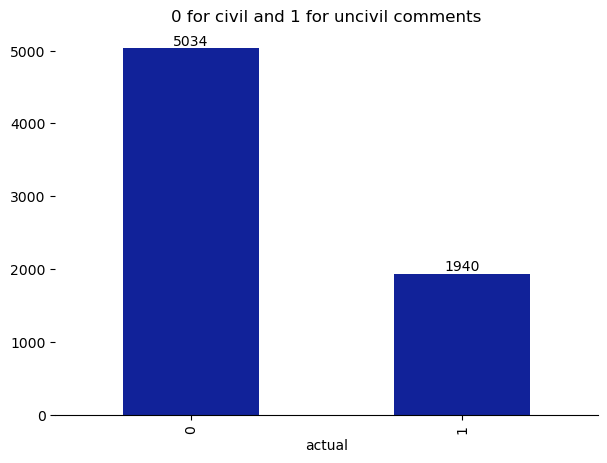

In [14]:
import matplotlib.pyplot as plt

bar = final_df['actual'].value_counts().plot.bar(color='#129', figsize=(7, 5))
plt.bar_label(bar.containers[0])
plt.title("0 for civil and 1 for uncivil comments")

bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)

plt.show()

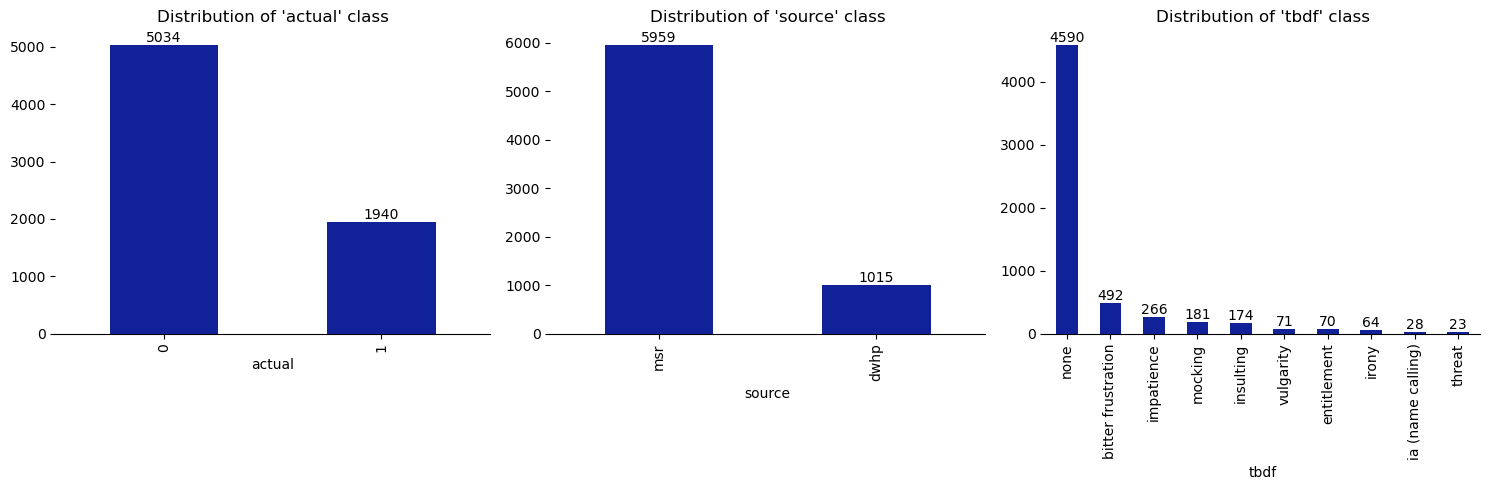

In [15]:
import math

colunas = final_df.columns.tolist()[1:]


num_colunas = 3
num_graficos = len(colunas)
num_linhas = math.ceil(num_graficos / num_colunas)

fig, axes = plt.subplots(num_linhas, num_colunas, figsize=(15, num_linhas * 5))
axes = axes.flatten()

for i, coluna in enumerate(colunas):
    if final_df[coluna].dtype == 'object' or final_df[coluna].nunique() < 20:
        ax = final_df[coluna].value_counts().plot.bar(ax=axes[i], color='#129')

        for container in ax.containers:
            ax.bar_label(container)

        ax.set_title(f"Distribution of '{coluna}' class")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

for j in range(num_graficos, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [17]:
final_df.to_csv('data/final_df.csv', index=False)



*   **Todas as colunas estão desbalanceadas**

*   **Temos 6974 dados para a granuralidade grossa, mas apenas 5959 para a granularidade fina (considerando os None)**


In [18]:
final_df.isna().sum()

message       0
actual        0
source        0
tbdf       1015
dtype: int64